## Observations and Insights

Observation 1: 
There is an outlier in the Infubinol group.

Obeservation 2:
In the Capomulin group, the heavier the mice is, the bigger the average tumor volume is. 

Oberservation 3: 
According to the line plot and box plot, the volume of tumor decreases as time passes, therefore Capomulin and Ramicane are effective in reducing the tumor volume. 

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
print(mouse_metadata)
print(study_results)

# Combine the data into a single dataset
merge_table = study_results.merge(mouse_metadata, on="Mouse ID", how="outer")
merge_table

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0    

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

sort_data = merge_table.sort_values(by=["Drug Regimen", "Tumor Volume (mm3)"], ascending=True)
regimen_types = sort_data.groupby(["Drug Regimen"])
mean = round(regimen_types["Tumor Volume (mm3)"].mean(), 2)
print(mean)
median = round(regimen_types["Tumor Volume (mm3)"].median(), 2)
print(median)
variance = round(regimen_types["Tumor Volume (mm3)"].var(ddof=0), 2)
print(variance)
std = round(regimen_types["Tumor Volume (mm3)"].std(ddof=0), 2)
print(std)
sem = round(regimen_types["Tumor Volume (mm3)"].sem(ddof=0), 2)
print(sem)

Drug Regimen
Capomulin    40.68
Ceftamin     52.59
Infubinol    52.88
Ketapril     55.24
Naftisol     54.33
Placebo      54.03
Propriva     52.32
Ramicane     40.22
Stelasyn     54.23
Zoniferol    53.24
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    41.56
Ceftamin     51.78
Infubinol    51.82
Ketapril     53.70
Naftisol     52.51
Placebo      52.29
Propriva     50.85
Ramicane     40.67
Stelasyn     52.43
Zoniferol    51.82
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    24.84
Ceftamin     39.07
Infubinol    42.89
Ketapril     68.19
Naftisol     65.82
Placebo      60.83
Propriva     42.09
Ramicane     23.38
Stelasyn     59.12
Zoniferol    48.27
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    4.98
Ceftamin     6.25
Infubinol    6.55
Ketapril     8.26
Naftisol     8.11
Placebo      7.80
Propriva     6.49
Ramicane     4.84
Stelasyn     7.69
Zoniferol    6.95
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    0.33
Cef

## Bar plots

           Drug Regimen
Capomulin           230
Ramicane            228
Ketapril            188
Naftisol            186
Zoniferol           182
Stelasyn            181
Placebo             181
Infubinol           178
Ceftamin            178
Propriva            161


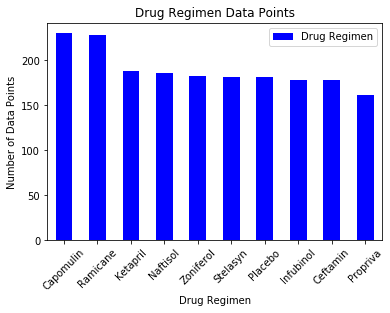

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points = merge_table["Drug Regimen"].value_counts().to_frame()
print(data_points)
bar_chart = data_points.plot.bar(title="Drug Regimen Data Points", color="b", rot=45)
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("Number of Data Points")
bar_chart


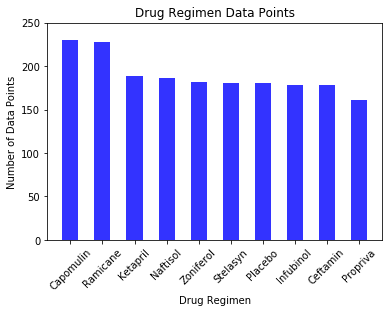

<Figure size 432x288 with 0 Axes>

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# x_axis = np.arange(len(data_points["Drug Regimen"]))
plt.bar(data_points.index.values, data_points["Drug Regimen"], color='b', alpha=0.8, width=0.5, align="center")
plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Drug Regimen Data Points")
plt.ylim(0, 250)
plt.show()
plt.tight_layout()

## Pie plots

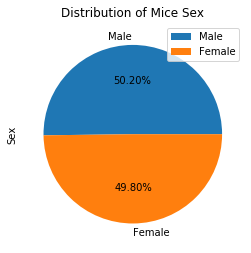

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_counts = merge_table.drop_duplicates("Mouse ID")
gender_counts=gender_counts["Sex"].value_counts().to_frame()
gender_counts
pie_chart = gender_counts.plot.pie(y="Sex", autopct="%1.2f%%", title="Distribution of Mice Sex", figsize=(4, 7))
pie_chart


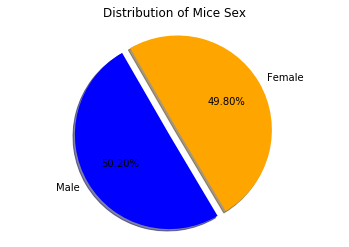

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


explode = (0.1, 0)
labels = ["Male", "Female"]
colors = ["blue", "orange"]
plt.pie(gender_counts["Sex"], explode=explode, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.title("Distribution of Mice Sex")
plt.show()



## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
# Capomulin, Ramicane, Infubinol, and Ceftamin

# # Capomulin

cap = merge_table["Drug Regimen"].isin(["Capomulin"])
merge_table[cap]
cap_sort_time = merge_table[cap].sort_values("Timepoint", ascending=True)
cap_group_time = cap_sort_time.groupby("Mouse ID")
cap_final_time = cap_group_time.last()
cap_final_time


cap_quartiles = cap_final_time["Tumor Volume (mm3)"].quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[.25]
cap_upperq = cap_quartiles[.75]
cap_iqr = cap_upperq-cap_lowerq 

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)



# # Ramicane

ram = merge_table["Drug Regimen"].isin(["Ramicane"])
merge_table[ram]
ram_sort_time = merge_table[ram].sort_values("Timepoint", ascending=True)
ram_group_time = ram_sort_time.groupby("Mouse ID")
ram_final_time = ram_group_time.last()


ram_quartiles = ram_final_time["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[.25]
ram_upperq = ram_quartiles[.75]
ram_iqr = ram_upperq-ram_lowerq 


ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
ram_quartiles

# # Infubinol

inf = merge_table["Drug Regimen"].isin(["Infubinol"])
merge_table[inf]

inf_sort_time = merge_table[inf].sort_values("Timepoint", ascending=True)
inf_group_time = inf_sort_time.groupby("Mouse ID")
inf_final_time = inf_group_time.last()
inf_final_time


inf_quartiles = inf_final_time["Tumor Volume (mm3)"].quantile([.25,.5,.75])
inf_quartiles
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq 

inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)


# # Ceftamin
cef = merge_table["Drug Regimen"].isin(["Ceftamin"])
merge_table[cef]

cef_sort_time = merge_table[cef].sort_values("Timepoint", ascending=True)
cef_group_time = cef_sort_time.groupby("Mouse ID")
cef_final_time = cef_group_time.last()
cef_final_time


cef_quartiles = cef_final_time["Tumor Volume (mm3)"].quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq 

cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)

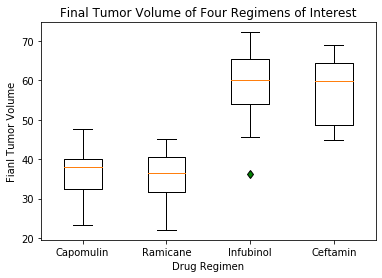

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


data = {"Capomulin": cap_final_time["Tumor Volume (mm3)"],
       "Ramicane": ram_final_time["Tumor Volume (mm3)"],
       "Infubinol": inf_final_time["Tumor Volume (mm3)"],
       "Ceftamin": cef_final_time["Tumor Volume (mm3)"]}

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Four Regimens of Interest')
ax1.set_ylabel('Fianl Tumor Volume')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data.values(), showfliers=True, flierprops={"markerfacecolor": "g", "marker": "d"})
ax1.set_xticklabels(data.keys())
plt.show()

## Line and scatter plots

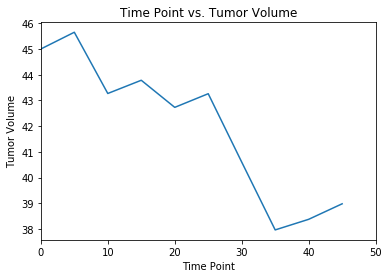

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

f1 = merge_table["Drug Regimen"].isin(["Capomulin"])
f2 = merge_table["Mouse ID"].isin(["b128"])
filter_data = merge_table[f1 & f2]
volume = filter_data[["Timepoint", "Tumor Volume (mm3)"]]

plt.plot(volume["Timepoint"],volume["Tumor Volume (mm3)"])
plt.xlim(0, 50)
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume")
plt.title("Time Point vs. Tumor Volume")

plt.show()

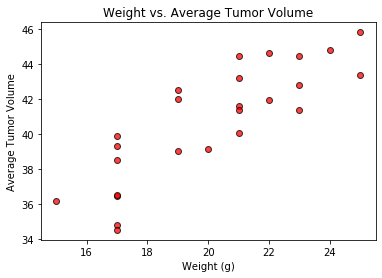

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cap_table = merge_table[cap]
cap_groupby = cap_table.groupby("Mouse ID").mean()
avg_tumor = cap_groupby["Tumor Volume (mm3)"]
weight = cap_groupby["Weight (g)"]

plt.scatter(weight, avg_tumor, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.title("Weight vs. Average Tumor Volume")
plt.show()

The correlation coefficient is 0.8419363424694718
The linear regression model is Average Tumor Volume = 0.9544396890241045*weight + 21.552160532685015


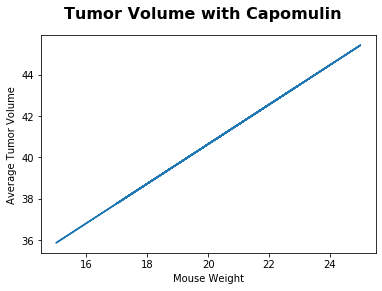

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen


(slope, intercept, r_value, p_value, stderr) = st.linregress(weight, avg_tumor)
fit = slope * weight + intercept
fig, ax = plt.subplots()

fig.suptitle("Tumor Volume with Capomulin", fontsize=16, fontweight="bold")
plt.plot(weight, fit)
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")

print(f"The correlation coefficient is {r_value}")
print(f"The linear regression model is Average Tumor Volume = {slope}*weight + {intercept}")
 